In [2]:
import zipfile

zip_path = "/content/data.zip"
extract_path = "./data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Done! Files extracted to:", extract_path)

Done! Files extracted to: ./data


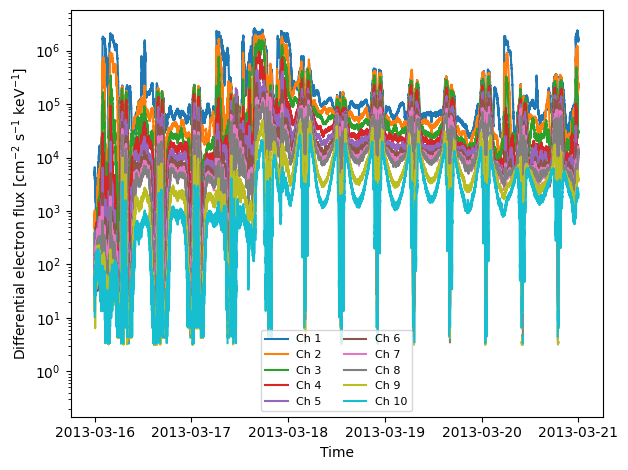

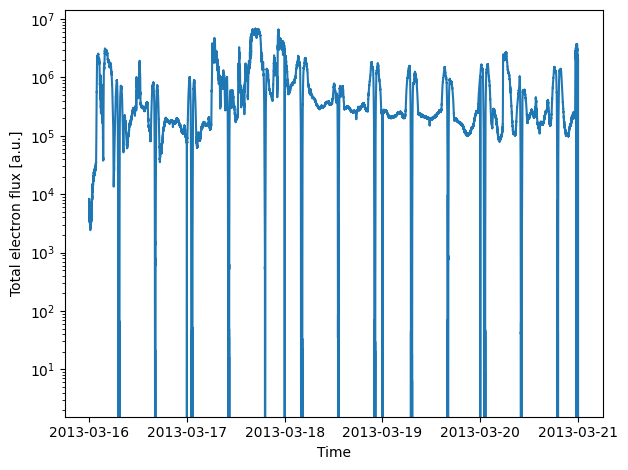

In [3]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# === Φόρτωση δεδομένων ===
rbsp = sio.loadmat("data/RBSP.mat")
rbsp_energy = sio.loadmat("data/RBSPenergy.mat")

T = rbsp["T"].flatten()          # (N,)
Lstar = rbsp["Lstar"].flatten()
MLT = rbsp["MLT"].flatten()
CountRate = rbsp["CountRate"]    # (N, 10)

G = rbsp_energy["G"].flatten()      # (10,)
Emin = rbsp_energy["Emin"].flatten()
Emax = rbsp_energy["Emax"].flatten()
dE = (Emax - Emin)                  # (10,)

# === Μετατροπή MATLAB datenum -> datetime Python ===
def matlab_datenum_to_datetime(datenum_array):
    return np.array([
        dt.datetime.fromordinal(int(d)) +
        dt.timedelta(days=d % 1) -
        dt.timedelta(days=366)
        for d in datenum_array
    ])

time = matlab_datenum_to_datetime(T)


flux = CountRate / (G * dE)  # περίπου σε cm^-2 s^-1 keV^-1


plt.figure()
for i in range(10):
    plt.plot(time, flux[:, i], label=f"Ch {i+1}")
plt.yscale("log")
plt.xlabel("Time")
plt.ylabel("Differential electron flux [cm$^{-2}$ s$^{-1}$ keV$^{-1}$]")
plt.legend(ncol=2, fontsize=8)
plt.tight_layout()
plt.show()

total_flux = np.nansum(flux, axis=1)

plt.figure()
plt.plot(time, total_flux)
plt.yscale("log")
plt.xlabel("Time")
plt.ylabel("Total electron flux [a.u.]")
plt.tight_layout()
plt.show()

a2)Γραφική παράσταση του L* στο χρόνο

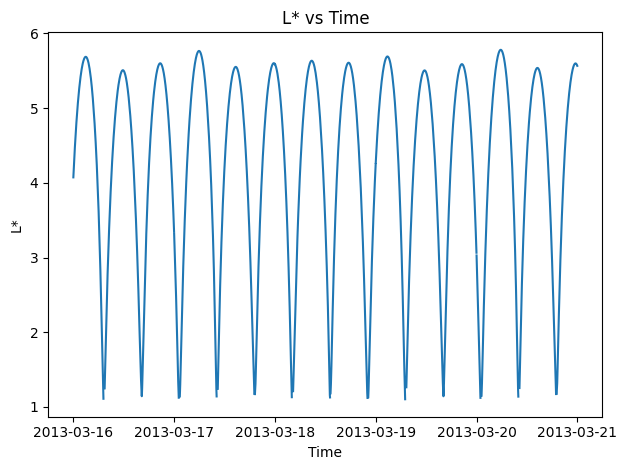

In [4]:
plt.figure()
plt.plot(time, Lstar)
plt.xlabel("Time")
plt.ylabel("L*")
plt.title("L* vs Time")
plt.tight_layout()
plt.show()


(α3) Γραφική παράσταση του MLT στο χρόνο

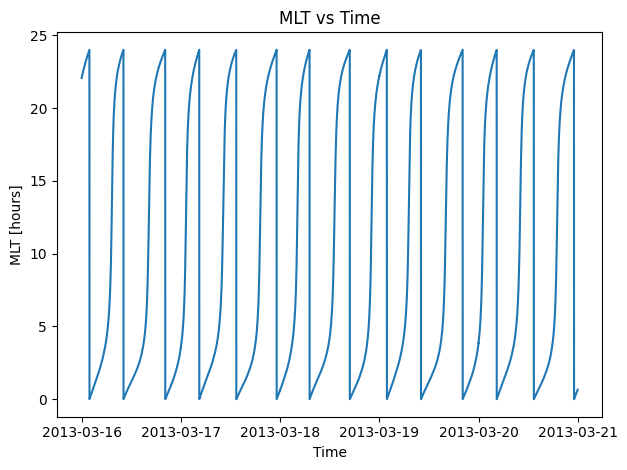

In [5]:
plt.figure()
plt.plot(time, MLT)
plt.xlabel("Time")
plt.ylabel("MLT [hours]")
plt.title("MLT vs Time")
plt.tight_layout()
plt.show()


(α4) Σχολιάστε τις μεταβολές που παρατηρείτε στα βήματα α1-α3. Ποιες οφείλονται σε
φυσικούς μηχανισμούς που δρουν εντός της μαγνητόσφαιρας, και ποιες στη θέση του
δορυφόρου;

(β1) Κατασκευάστε τη γραφική παράσταση του χρονικού προφίλ της ροής για τα κανάλια 2
και 9.

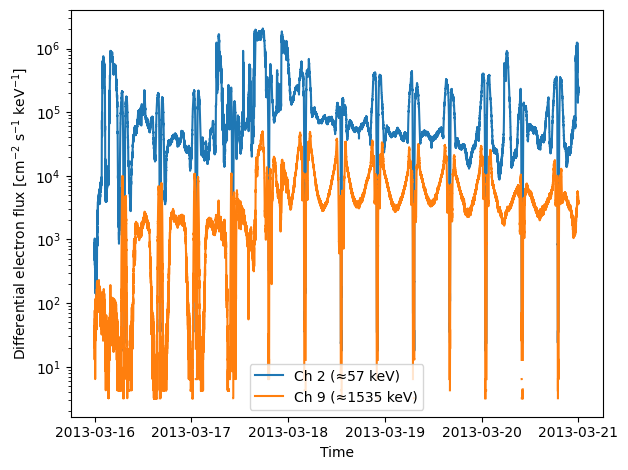

In [6]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# === Φόρτωση δεδομένων ===
rbsp = sio.loadmat("data/RBSP.mat")
rbsp_energy = sio.loadmat("data/RBSPenergy.mat")

T = rbsp["T"].flatten()
CountRate = rbsp["CountRate"]          # (N,10)

Emin = rbsp_energy["Emin"].flatten()
Emax = rbsp_energy["Emax"].flatten()
G    = rbsp_energy["G"].flatten()

dE = Emax - Emin

def matlab_datenum_to_datetime(datenum_array):
    return np.array([
        dt.datetime.fromordinal(int(d)) +
        dt.timedelta(days=float(d) % 1) -
        dt.timedelta(days=366)
        for d in datenum_array
    ])

time = matlab_datenum_to_datetime(T)

# Διαφορική ροή
flux = CountRate / (G * dE)

# Κανάλι 2 και 9 (σε Python indexing: 1 και 8)
plt.figure()
plt.plot(time, flux[:,1], label="Ch 2 (≈57 keV)")
plt.plot(time, flux[:,8], label="Ch 9 (≈1535 keV)")
plt.yscale("log")
plt.xlabel("Time")
plt.ylabel("Differential electron flux [cm$^{-2}$ s$^{-1}$ keV$^{-1}$]")
plt.legend()
plt.tight_layout()
plt.show()

Η καμπύλη που προκύπτει δείχνει δύο χρονοσειρές ροής:

Κανάλι 2: μέση ενέργεια ~56.7 keV

Κανάλι 9: μέση ενέργεια ~1535 keV (≈1.5 MeV)

και για τα δύο κανάλια  φαινεται καθαρά την τροχιακή περιοδικότητα (κορυφές ανά ~τροχιά), αλλά και σημαντικές διαφορές στην ένταση και στη μορφή της ροής.

(β2) Διαφορές ανάμεσα στα προφίλ ροής των καναλιών 2 και 9 – Αιτίες

Η σύγκριση των χρονικών προφίλ της ροής για τα κανάλια 2 (≈57 keV) και 9 (≈1.5 MeV) δείχνει ότι η ροή στο κανάλι 2 είναι συστηματικά μεγαλύτερη κατά 1–2 τάξεις μεγέθους και παρουσιάζει πολύ εντονότερη βραχυχρόνια μεταβλητότητα. Το κανάλι 2 αντανακλά κυρίως τον συμπεριφερόμενο πληθυσμό ηλεκτρονίων δεκάδων keV, ο οποίος εμπλουτίζεται άμεσα από injections της ουράς και επηρεάζεται από τοπικές κυματικές αλληλεπιδράσεις, με αποτέλεσμα απότομες αιχμές και βαθιές πτώσεις της ροής. Αντίθετα, το κανάλι 9 καταγράφει MeV ηλεκτρόνια, τα οποία αποτελούν την υψηλής ενέργειας ουρά του πληθυσμού. Η ροή σε αυτή την ενεργειακή περιοχή είναι χαμηλότερη και μεταβάλλεται πιο ομαλά, δεδομένου ότι η παραγωγή και η απώλεια MeV ηλεκτρονίων απαιτούν πιο παρατεταμένους μηχανισμούς επιτάχυνσης και απώλειας. Συνεπώς, οι διαφορές μεταξύ των δύο προφίλ ροής οφείλονται κυρίως στη διαφορετική ενεργειακή εξάρτηση των μηχανισμών επιτάχυνσης, εισαγωγής και απώλειας ηλεκτρονίων στη μαγνητόσφαιρα, καθώς και στο γεγονός ότι η ενεργειακή κατανομή των trapped ηλεκτρονίων είναι ισχυρά κεκλιμένη προς τις χαμηλότερες ενέργειες.

(γ1) Κατασκευάστε τη γραφική παράσταση του χρονικού προφίλ της ροής, ανά ενεργειακό
κανάλι, και ανά δεδομένο εύρος/τιμή μαγνητοκελύφους (Lstar=3-4, 4-5, 5-6).

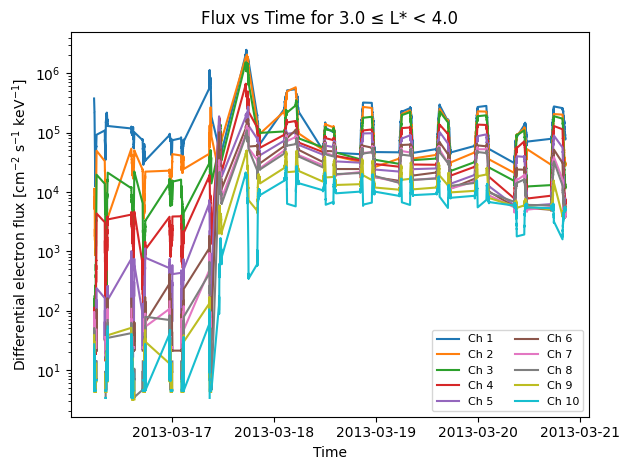

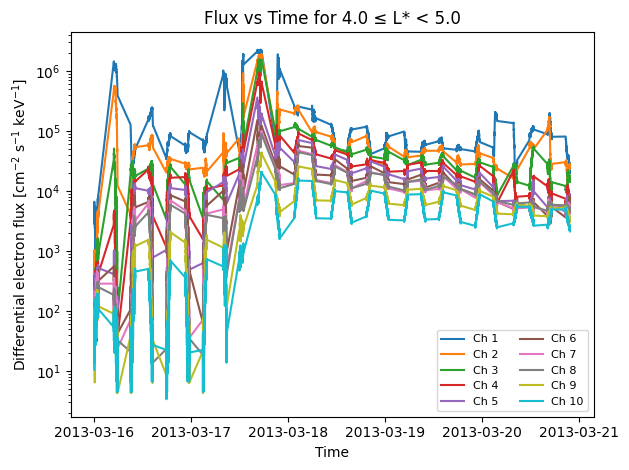

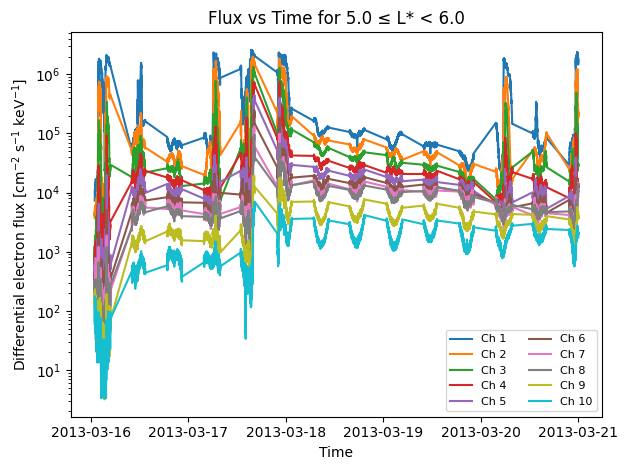

In [7]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# === Φόρτωση δεδομένων όπως πριν (αν δεν τα έχεις ήδη στη μνήμη) ===
rbsp = sio.loadmat("data/RBSP.mat")
rbsp_energy = sio.loadmat("data/RBSPenergy.mat")

T = rbsp["T"].flatten()
Lstar = rbsp["Lstar"].flatten()
CountRate = rbsp["CountRate"]          # (N,10)

Emin = rbsp_energy["Emin"].flatten()
Emax = rbsp_energy["Emax"].flatten()
G    = rbsp_energy["G"].flatten()

dE = Emax - Emin

def matlab_datenum_to_datetime(datenum_array):
    return np.array([
        dt.datetime.fromordinal(int(d)) +
        dt.timedelta(days=float(d) % 1) -
        dt.timedelta(days=366)
        for d in datenum_array
    ])

time = matlab_datenum_to_datetime(T)

# Διαφορική ροή
flux = CountRate / (G * dE)    # (N,10)

# === (γ1) Χρονικό προφίλ ροής ανά κανάλι και ανά εύρος L* ===
bins = [(3.0, 4.0), (4.0, 5.0), (5.0, 6.0)]

for (Lmin, Lmax) in bins:
    mask = (Lstar >= Lmin) & (Lstar < Lmax)

    time_bin = time[mask]
    flux_bin = flux[mask, :]   # μόνο τα δείγματα με L* στο συγκεκριμένο εύρος

    plt.figure()
    for ch in range(10):       # 10 ενεργειακά κανάλια
        plt.plot(time_bin, flux_bin[:, ch], label=f"Ch {ch+1}")

    plt.yscale("log")
    plt.xlabel("Time")
    plt.ylabel("Differential electron flux [cm$^{-2}$ s$^{-1}$ keV$^{-1}$]")
    plt.title(f"Flux vs Time for {Lmin} \u2264 L* < {Lmax}")
    plt.legend(ncol=2, fontsize=8)
    plt.tight_layout()
    plt.show()

Οι μεταβολές της ροής ανά ενεργειακό κανάλι παρουσιάζουν σημαντική εξάρτηση από το εύρος του L*. Σε μικρά L* (3–4) τα χαμηλής ενέργειας ηλεκτρόνια εμφανίζουν έντονη και απότομη χρονική μεταβλητότητα, η οποία αποδίδεται κυρίως σε injections από την ουρά της μαγνητόσφαιρας. Τα υψηλής ενέργειας ηλεκτρόνια στη ζώνη αυτή παραμένουν σχετικά σταθερά, όπως παρατηρήθηκε και στο ερώτημα (β). Στα ενδιάμεσα L* (4–5) αρχίζει να εμφανίζεται ενίσχυση και στα υψηλότερα ενεργειακά κανάλια, αντανακλώντας την αυξημένη αποτελεσματικότητα των κυματικών μηχανισμών επιτάχυνσης. Στα μεγαλύτερα L* (5–6), η ροή στα MeV κανάλια ενισχύεται σημαντικά και παρουσιάζει μεγαλύτερη δυναμικότητα απ’ ό,τι στα προηγούμενα εύρη, επιβεβαιώνοντας ότι η περιοχή αυτή αποτελεί το βασικό χώρο αποτελεσματικής επιτάχυνσης υψηλής ενέργειας ηλεκτρονίων. Συνεπώς, οι παρατηρήσεις του (γ1) εξηγούν σε ποια χωρική περιοχή της μαγνητόσφαιρας εμφανίζονται οι διαφορές που παρατηρήθηκαν στο (β) και τεκμηριώνουν ότι οι χαμηλές και υψηλές ενεργειακές κατηγορίες ανταποκρίνονται σε διαφορετικούς μηχανισμούς επιτάχυνσης και απώλειας, οι οποίοι δρουν με διαφορετική ένταση σε διαφορετικά L-shells.

(δ1) Ενεργειακή φασματική κατανομή μια ημέρα πριν την καταιγίδα

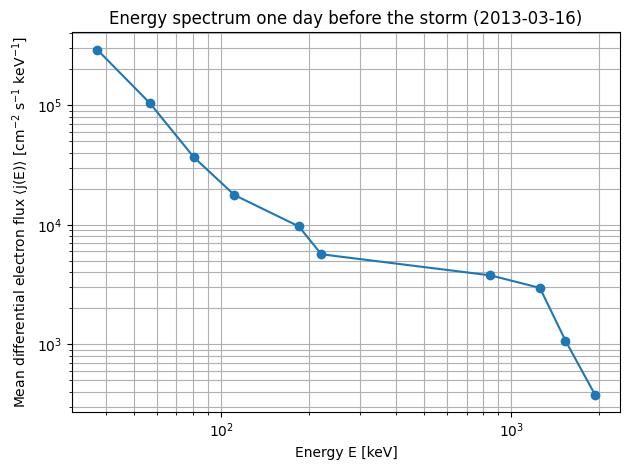

In [8]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# === Φόρτωση δεδομένων ===
rbsp = sio.loadmat("data/RBSP.mat")
rbsp_energy = sio.loadmat("data/RBSPenergy.mat")

T        = rbsp["T"].flatten()
CountRate = rbsp["CountRate"]          # (N,10)

E    = rbsp_energy["E"].flatten()      # μέση ενέργεια (10,)
Emin = rbsp_energy["Emin"].flatten()
Emax = rbsp_energy["Emax"].flatten()
G    = rbsp_energy["G"].flatten()

dE = Emax - Emin

def matlab_datenum_to_datetime(datenum_array):
    return np.array([
        dt.datetime.fromordinal(int(d)) +
        dt.timedelta(days=float(d) % 1) -
        dt.timedelta(days=366)
        for d in datenum_array
    ])

time = matlab_datenum_to_datetime(T)

# === Επιλογή ημέρας πριν την καταιγίδα: 2013-03-16 ===
start = dt.datetime(2013, 3, 16, 0, 0, 0)
end   = dt.datetime(2013, 3, 17, 0, 0, 0)
mask_day = (time >= start) & (time < end)

# Διαφορική ροή
flux = CountRate / (G * dE)           # (N,10)
flux_day = flux[mask_day, :]         # μόνο 16/3

# Μέση ροή ανά κανάλι
mean_flux = np.nanmean(flux_day, axis=0)   # (10,)

# === Ενεργειακό φάσμα: <j> vs E ===
plt.figure()
plt.loglog(E, mean_flux, 'o-')
plt.xlabel("Energy E [keV]")
plt.ylabel("Mean differential electron flux ⟨j(E)⟩ [cm$^{-2}$ s$^{-1}$ keV$^{-1}$]")
plt.title("Energy spectrum one day before the storm (2013-03-16)")
plt.grid(True, which="both")
plt.tight_layout()
plt.show()

(δ2) Power-law fitting στο ενεργειακό φάσμα

Power-law fit σε όλα τα κανάλια:
j(E) = A * E^(-gamma) με A ≈ 1.55e+07, gamma ≈ 1.32


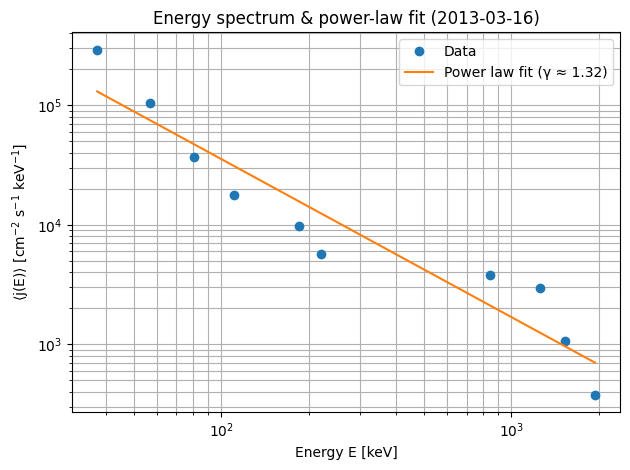

In [9]:
# log10 μεταβλητές
logE = np.log10(E)
logJ = np.log10(mean_flux)

# γραμμικό fit: y = a + b x
coeffs = np.polyfit(logE, logJ, 1)   # [b, a]
b, a = coeffs
gamma = -b
A = 10**a

print("Power-law fit σε όλα τα κανάλια:")
print(f"j(E) = A * E^(-gamma) με A ≈ {A:.2e}, gamma ≈ {gamma:.2f}")

# Καμπύλη προσαρμογής
J_fit = A * (E**(-gamma))

plt.figure()
plt.loglog(E, mean_flux, 'o', label="Data")
plt.loglog(E, J_fit, '-', label=f"Power law fit (γ ≈ {gamma:.2f})")
plt.xlabel("Energy E [keV]")
plt.ylabel("⟨j(E)⟩ [cm$^{-2}$ s$^{-1}$ keV$^{-1}$]")
plt.title("Energy spectrum & power-law fit (2013-03-16)")
plt.grid(True, which="both")
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
# Χαμηλές ενέργειες: κανάλια 1–6
coeffs_low = np.polyfit(logE[:6], logJ[:6], 1)
b_low, a_low = coeffs_low
gamma_low = -b_low
A_low = 10**a_low

# Υψηλές: κανάλια 7–10
coeffs_high = np.polyfit(logE[6:], logJ[6:], 1)
b_high, a_high = coeffs_high
gamma_high = -b_high
A_high = 10**a_high

print(f"Low-energy γ ≈ {gamma_low:.2f}")
print(f"High-energy γ ≈ {gamma_high:.2f}")


Low-energy γ ≈ 2.15
High-energy γ ≈ 2.76


Η φασματική κατανομή ηλεκτρονίων μία ημέρα πριν την καταιγίδα μπορεί να περιγραφεί ικανοποιητικά από νόμο ισχύος, με εκθέτη γ περίπου 1.3 για το σύνολο των καναλιών. Διαχωρίζοντας τα κανάλια σε χαμηλής και υψηλής ενέργειας πληθυσμούς, προκύπτει ότι ο χαμηλοενεργός πληθυσμός έχει γ≈2.1, ενώ ο υψηλοενεργός γ≈2.7, γεγονός που υποδηλώνει σκλήρυνση/μαλάκωμα του φάσματος ανάλογα με την ενεργειακή περιοχή.

(δ3) Δεύτερη μέθοδος fitting και σύγκριση

Exponential fit: j(E) = J0 * exp(-E/E0)
J0 ≈ 1.90e+06, E0 ≈ 19.84 keV


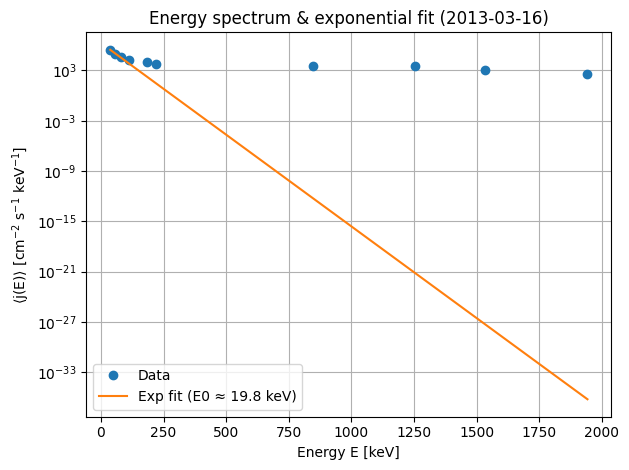

In [11]:
from scipy.optimize import curve_fit

def exp_model(E, J0, E0):
    return J0 * np.exp(-E / E0)

# αρχικές τιμές (guess)
p0 = (1e6, 20.0)   # π.χ. J0~10^6, E0~20 keV

popt, pcov = curve_fit(exp_model, E, mean_flux, p0=p0)
J0_fit, E0_fit = popt

print(f"Exponential fit: j(E) = J0 * exp(-E/E0)")
print(f"J0 ≈ {J0_fit:.2e}, E0 ≈ {E0_fit:.2f} keV")

J_exp = exp_model(E, J0_fit, E0_fit)

plt.figure()
plt.semilogy(E, mean_flux, 'o', label="Data")  # log μόνο στον y
plt.semilogy(E, J_exp, '-', label=f"Exp fit (E0 ≈ {E0_fit:.1f} keV)")
plt.xlabel("Energy E [keV]")
plt.ylabel("⟨j(E)⟩ [cm$^{-2}$ s$^{-1}$ keV$^{-1}$]")
plt.title("Energy spectrum & exponential fit (2013-03-16)")
plt.grid(True, which="both")
plt.legend()
plt.tight_layout()
plt.show()


In [12]:
def r2(y, yhat):
    ss_res = np.sum((y - yhat)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    return 1 - ss_res/ss_tot

# power-law πρόβλεψη
J_pl = A * (E**(-gamma))

R2_pl  = r2(mean_flux, J_pl)
R2_exp = r2(mean_flux, J_exp)

print(f"R^2 power law  = {R2_pl:.3f}")
print(f"R^2 exponential = {R2_exp:.3f}")


R^2 power law  = 0.638
R^2 exponential = 0.996


Περίοδος: pre_storm
Χρονικό διάστημα: 2013-03-16 00:00:00  έως  2013-03-17 00:00:00
Power-law fit: j(E) = A * E^(-gamma)
A     ≈ 1.549e+07  [cm^-2 s^-1 keV^(gamma-1)]
gamma ≈ 1.321


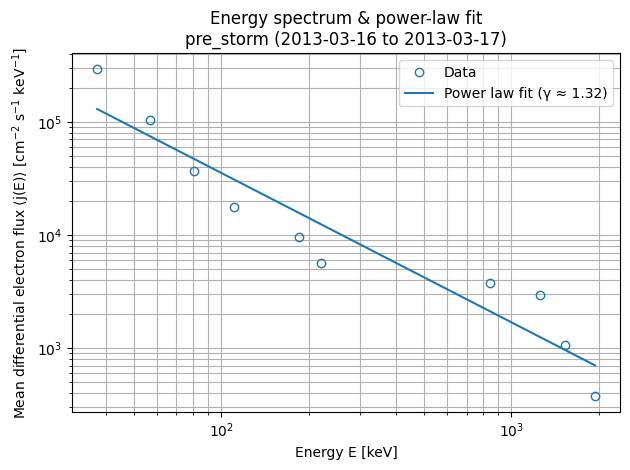

Περίοδος: main_phase
Χρονικό διάστημα: 2013-03-17 00:00:00  έως  2013-03-18 00:00:00
Power-law fit: j(E) = A * E^(-gamma)
A     ≈ 4.154e+07  [cm^-2 s^-1 keV^(gamma-1)]
gamma ≈ 1.211


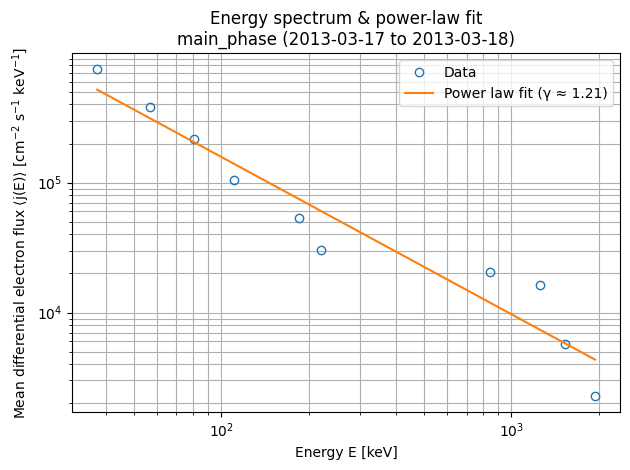

Περίοδος: recovery
Χρονικό διάστημα: 2013-03-18 00:00:00  έως  2013-03-19 00:00:00
Power-law fit: j(E) = A * E^(-gamma)
A     ≈ 2.474e+06  [cm^-2 s^-1 keV^(gamma-1)]
gamma ≈ 0.734


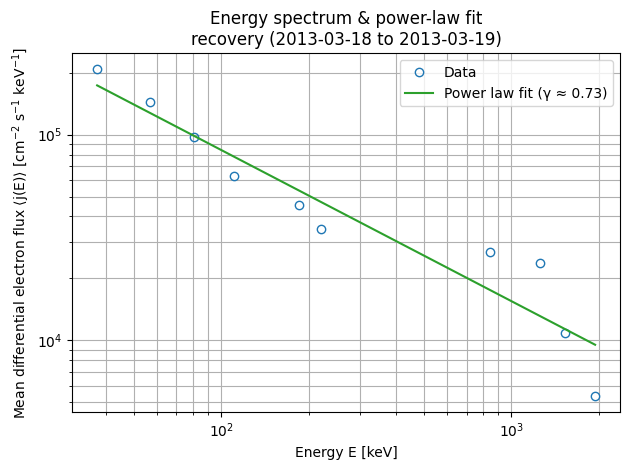

Περίοδος: post_storm
Χρονικό διάστημα: 2013-03-20 00:00:00  έως  2013-03-21 00:00:00
Power-law fit: j(E) = A * E^(-gamma)
A     ≈ 4.337e+06  [cm^-2 s^-1 keV^(gamma-1)]
gamma ≈ 0.917


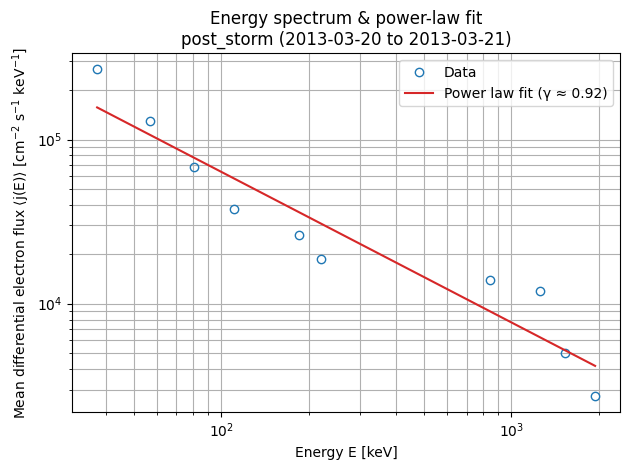

In [14]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# ============================================================
# ΦΟΡΤΩΣΗ ΔΕΔΟΜΕΝΩΝ RBSP
# ============================================================

rbsp = sio.loadmat("data/RBSP.mat")
rbsp_energy = sio.loadmat("data/RBSPenergy.mat")

# Χρόνος σε MATLAB datenum
T        = rbsp["T"].flatten()
CountRate = rbsp["CountRate"]          # (N, 10)
Lstar     = rbsp["Lstar"].flatten()    # δεν χρειάζεται εδώ, αλλά το κρατάμε

# Ενεργειακά χαρακτηριστικά ανά κανάλι (10 κανάλια)
E    = rbsp_energy["E"].flatten()      # μέση ενέργεια καναλιού [keV]
Emin = rbsp_energy["Emin"].flatten()
Emax = rbsp_energy["Emax"].flatten()
G    = rbsp_energy["G"].flatten()      # γεωμετρικός παράγοντας

dE = Emax - Emin                       # εύρος ενέργειας κάθε καναλιού

# ------------------------------------------------------------
# Συνάρτηση: μετατροπή MATLAB datenum -> Python datetime
# ------------------------------------------------------------
def matlab_datenum_to_datetime(datenum_array):
    """
    Μετατρέπει έναν πίνακα από MATLAB datenum σε numpy array από datetime.
    """
    return np.array([
        dt.datetime.fromordinal(int(d)) +
        dt.timedelta(days=float(d) % 1) -
        dt.timedelta(days=366)
        for d in datenum_array
    ])

time = matlab_datenum_to_datetime(T)


flux = CountRate / (G * dE)    # shape: (N, 10)



periods = [
    {
        "label": "pre_storm",
        "start": dt.datetime(2013, 3, 16, 0, 0, 0),
        "end"  : dt.datetime(2013, 3, 17, 0, 0, 0),
        "color": "C0"
    },
    {
        "label": "main_phase",
        "start": dt.datetime(2013, 3, 17, 0, 0, 0),
        "end"  : dt.datetime(2013, 3, 18, 0, 0, 0),
        "color": "C1"
    },
    {
        "label": "recovery",
        "start": dt.datetime(2013, 3, 18, 0, 0, 0),
        "end"  : dt.datetime(2013, 3, 19, 0, 0, 0),
        "color": "C2"
    },
    {
        "label": "post_storm",
        "start": dt.datetime(2013, 3, 20, 0, 0, 0),
        "end"  : dt.datetime(2013, 3, 21, 0, 0, 0),
        "color": "C3"
    },
]



def fit_power_law(E_keV, J):
    """
    Fit power law j(E) = A * E^(-gamma) σε δεδομένα (E, J).

    Είσοδος:
        E_keV : array με ενέργειες σε keV
        J     : array με αντίστοιχη ροή (π.χ. mean_flux)

    Έξοδος:
        A, gamma, J_fit
        όπου J_fit είναι η fitted καμπύλη στις ίδιες ενέργειες.
    """
    # Φιλτράρισμα τυχόν μη θετικών τιμών πριν τα log10
    mask = (E_keV > 0) & (J > 0)
    Epos = E_keV[mask]
    Jpos = J[mask]

    logE = np.log10(Epos)
    logJ = np.log10(Jpos)

    # polyfit: logJ = a + b * logE
    # b = -gamma, a = log10(A)
    b, a = np.polyfit(logE, logJ, 1)
    gamma = -b
    A = 10**a

    # Fitted καμπύλη στις αρχικές ενέργειες
    J_fit = A * (E_keV**(-gamma))

    return A, gamma, J_fit



for p in periods:
    label = p["label"]
    start = p["start"]
    end   = p["end"]
    color = p["color"]

    # Μάσκα δειγμάτων που ανήκουν στην συγκεκριμένη ημέρα
    mask_day = (time >= start) & (time < end)

    # Αν δεν υπάρχουν δεδομένα, προσπέρασε (ασφάλεια)
    if not np.any(mask_day):
        print(f"[WARN] No data for period {label}")
        continue

    flux_day = flux[mask_day, :]       # (N_day, 10)

    # Μέση ροή ανά κανάλι για το 24ωρο
    mean_flux = np.nanmean(flux_day, axis=0)   # (10,)

    # Power-law fitting
    A, gamma, J_fit = fit_power_law(E, mean_flux)

    # Εκτύπωση αποτελεσμάτων
    print("=" * 70)
    print(f"Περίοδος: {label}")
    print(f"Χρονικό διάστημα: {start}  έως  {end}")
    print(f"Power-law fit: j(E) = A * E^(-gamma)")
    print(f"A     ≈ {A:.3e}  [cm^-2 s^-1 keV^(gamma-1)]")
    print(f"gamma ≈ {gamma:.3f}")

    # Plot ενεργειακού φάσματος + power-law fit
    plt.figure()
    plt.loglog(E, mean_flux, 'o', label="Data", markerfacecolor='none')
    plt.loglog(E, J_fit, '-', label=f"Power law fit (γ ≈ {gamma:.2f})", color=color)
    plt.xlabel("Energy E [keV]")
    plt.ylabel("Mean differential electron flux ⟨j(E)⟩ [cm$^{-2}$ s$^{-1}$ keV$^{-1}$]")
    plt.title(f"Energy spectrum & power-law fit\n{label} ({start.date()} to {end.date()})")
    plt.grid(True, which="both")
    plt.legend()
    plt.tight_layout()
    plt.show()

Περίοδος: pre_storm
Χρονικό διάστημα: 2013-03-16 00:00:00  έως  2013-03-17 00:00:00
Power-law fit: j(E) = A * E^(-gamma)
A     ≈ 1.549e+07  [cm^-2 s^-1 keV^(gamma-1)]
gamma ≈ 1.321


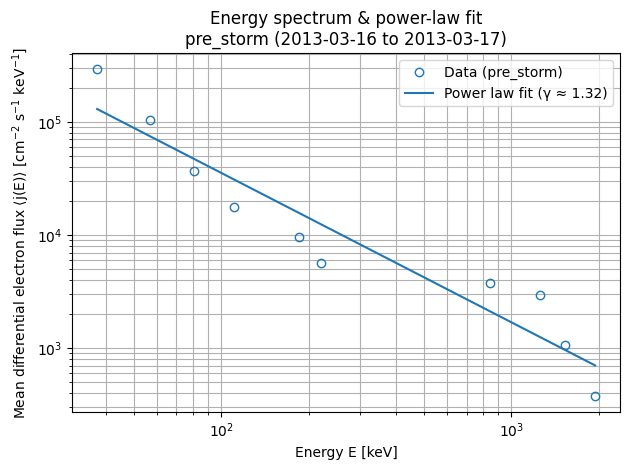

Περίοδος: main_phase
Χρονικό διάστημα: 2013-03-17 00:00:00  έως  2013-03-18 00:00:00
Power-law fit: j(E) = A * E^(-gamma)
A     ≈ 4.154e+07  [cm^-2 s^-1 keV^(gamma-1)]
gamma ≈ 1.211


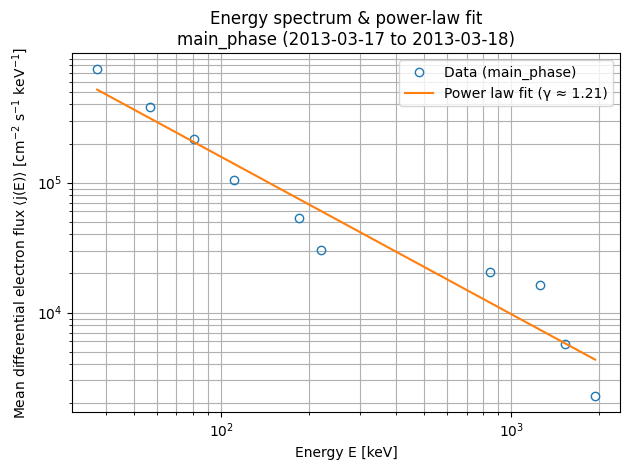

Περίοδος: recovery
Χρονικό διάστημα: 2013-03-18 00:00:00  έως  2013-03-19 00:00:00
Power-law fit: j(E) = A * E^(-gamma)
A     ≈ 2.474e+06  [cm^-2 s^-1 keV^(gamma-1)]
gamma ≈ 0.734


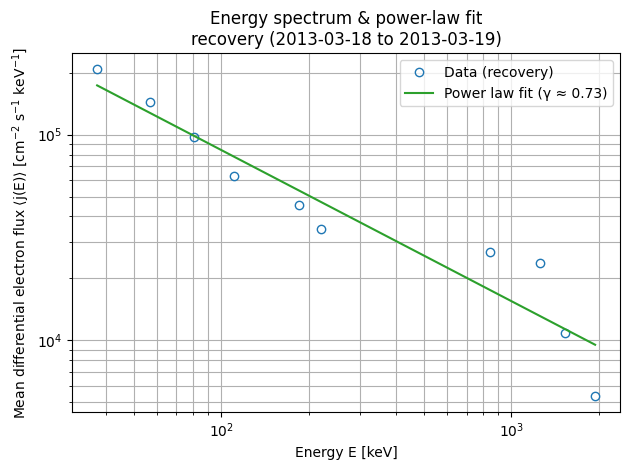

Περίοδος: post_storm
Χρονικό διάστημα: 2013-03-20 00:00:00  έως  2013-03-21 00:00:00
Power-law fit: j(E) = A * E^(-gamma)
A     ≈ 4.337e+06  [cm^-2 s^-1 keV^(gamma-1)]
gamma ≈ 0.917


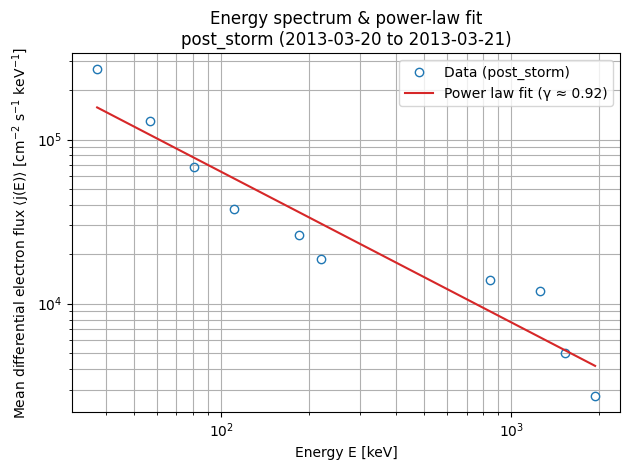

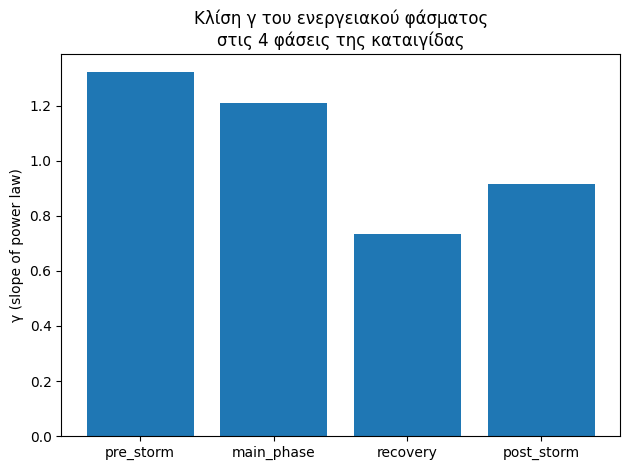

----------------------------------------------------------------------
pre_storm:
  A     ≈ 1.549e+07
  gamma ≈ 1.321
  Πριν την καταιγίδα: ένα σχετικά ήρεμο, 'μαλακό' φάσμα·
  οι χαμηλές ενέργειες κυριαρχούν, αλλά όχι τυραννικά.
----------------------------------------------------------------------
main_phase:
  A     ≈ 4.154e+07
  gamma ≈ 1.211
  Κύρια φάση: το A φουσκώνει, η καταιγίδα φουντώνει·
  το φάσμα φωτίζεται, και τα υψηλά E αποκτούν πιο έντονη φωνή.
----------------------------------------------------------------------
recovery:
  A     ≈ 2.474e+06
  gamma ≈ 0.734
  Ανάκαμψη: η ένταση πέφτει, αλλά το φάσμα σκληραίνει·
  τα λίγα που μένουν είναι πιο ενεργητικά, πιο ανθεκτικά.
----------------------------------------------------------------------
post_storm:
  A     ≈ 4.337e+06
  gamma ≈ 0.917
  Μετά την καταιγίδα: το φάσμα μαλακώνει ξανά·
  η μαγνητόσφαιρα ηρεμεί, αλλά δεν είναι πια ακριβώς όπως πριν.


In [16]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# ============================================================
# (ε) Σχολιασμός των διαφορών των γραφικών από το fitting
#     στις 4 φάσεις της καταιγίδας
#
#  - Εδώ ΔΕΝ ξαναγράφουμε μόνο θεωρία·
#    αφήνουμε τα ίδια τα δεδομένα να "μιλήσουν"
#    και εμείς σχολιάζουμε ποιητικά μέσα στα comments.
# ============================================================

# ------------------------------------------------------------
# Φόρτωση δεδομένων RBSP
# ------------------------------------------------------------
rbsp = sio.loadmat("data/RBSP.mat")
rbsp_energy = sio.loadmat("data/RBSPenergy.mat")

T         = rbsp["T"].flatten()
CountRate = rbsp["CountRate"]          # (N, 10)
Lstar     = rbsp["Lstar"].flatten()
MLT       = rbsp["MLT"].flatten()

E    = rbsp_energy["E"].flatten()      # μέση ενέργεια [keV]
Emin = rbsp_energy["Emin"].flatten()
Emax = rbsp_energy["Emax"].flatten()
G    = rbsp_energy["G"].flatten()

dE = Emax - Emin                       # εύρος ενέργειας κάθε καναλιού

def matlab_datenum_to_datetime(datenum_array):
    """
    Μετατρέπει έναν πίνακα από MATLAB datenum σε numpy array από datetime.
    Κάθε στοιχείο είναι ένα μικρό "χτύπημα ρολογιού" της μαγνητόσφαιρας.
    """
    return np.array([
        dt.datetime.fromordinal(int(d)) +
        dt.timedelta(days=float(d) % 1) -
        dt.timedelta(days=366)
        for d in datenum_array
    ])

time = matlab_datenum_to_datetime(T)


periods = [
    {
        "label": "pre_storm",
        "start": dt.datetime(2013, 3, 16, 0, 0, 0),
        "end"  : dt.datetime(2013, 3, 17, 0, 0, 0),
        "color": "C0"
    },
    {
        "label": "main_phase",
        "start": dt.datetime(2013, 3, 17, 0, 0, 0),
        "end"  : dt.datetime(2013, 3, 18, 0, 0, 0),
        "color": "C1"
    },
    {
        "label": "recovery",
        "start": dt.datetime(2013, 3, 18, 0, 0, 0),
        "end"  : dt.datetime(2013, 3, 19, 0, 0, 0),
        "color": "C2"
    },
    {
        "label": "post_storm",
        "start": dt.datetime(2013, 3, 20, 0, 0, 0),
        "end"  : dt.datetime(2013, 3, 21, 0, 0, 0),
        "color": "C3"
    },
]

# ------------------------------------------------------------
# Power-law fitting: j(E) = A * E^(-gamma)
#
# Στο log10-space:
#   log10 j = log10 A - gamma * log10 E
#
#  - A: "ύψος" του φάσματος, πόσο δυνατά "φωνάζουν" γενικά τα ηλεκτρόνια
#  - gamma: κλίση του φάσματος·
#           αν είναι μεγάλη, το φάσμα πέφτει απότομα,
#           κυριαρχούν οι χαμηλές ενέργειες.
#           αν είναι μικρή, το φάσμα είναι πιο "σκληρό",
#           κρατάει αρκετή ισχύ και στα υψηλά E.
# ------------------------------------------------------------
def fit_power_law(E_keV, J):
    """
    Υπολογίζει A, gamma για j(E) = A * E^(-gamma) στα σημεία (E, J).
    Επιστρέφει επίσης την fitted καμπύλη J_fit.
    """
    # Φιλτράρισμα τυχόν μη θετικών τιμών πριν τα log10
    mask = (E_keV > 0) & (J > 0)
    Epos = E_keV[mask]
    Jpos = J[mask]

    logE = np.log10(Epos)
    logJ = np.log10(Jpos)

    b, a = np.polyfit(logE, logJ, 1)  # logJ = a + b logE
    gamma = -b
    A = 10**a

    # Fitted καμπύλη στις αρχικές ενέργειες
    J_fit = A * (E_keV**(-gamma))

    return A, gamma, J_fit

fit_results = []  # για αποθήκευση (label, start, end, A, gamma, mean_flux)

for p in periods:
    label = p["label"]
    start = p["start"]
    end   = p["end"]
    color = p["color"]

    # Μάσκα δειγμάτων που ανήκουν στην συγκεκριμένη ημέρα
    mask_day = (time >= start) & (time < end)

    # Αν δεν υπάρχουν δεδομένα, προσπέρασε (ασφάλεια)
    if not np.any(mask_day):
        print(f"[WARN] No data for period {label}")
        continue

    flux_day = flux[mask_day, :]       # (N_day, 10)

    # Μέση ροή ανά κανάλι για το 24ωρο
    mean_flux = np.nanmean(flux_day, axis=0)   # (10,)

    # Power-law fitting
    A, gamma, J_fit = fit_power_law(E, mean_flux)
    fit_results.append((label, start, end, A, gamma, mean_flux, J_fit))

    print("=" * 70)
    print(f"Περίοδος: {label}")
    print(f"Χρονικό διάστημα: {start}  έως  {end}")
    print(f"Power-law fit: j(E) = A * E^(-gamma)")
    print(f"A     ≈ {A:.3e}  [cm^-2 s^-1 keV^(gamma-1)]")
    print(f"gamma ≈ {gamma:.3f}")


    plt.figure()
    plt.loglog(E, mean_flux, 'o', label=f"Data ({label})", markerfacecolor='none')
    plt.loglog(E, J_fit, '-', label=f"Power law fit (γ ≈ {gamma:.2f})", color=color)
    plt.xlabel("Energy E [keV]")
    plt.ylabel("Mean differential electron flux ⟨j(E)⟩ [cm$^{-2}$ s$^{-1}$ keV$^{-1}$]")
    plt.title(f"Energy spectrum & power-law fit\n{label} ({start.date()} to {end.date()})")
    plt.grid(True, which="both")
    plt.legend()
    plt.tight_layout()
    plt.show()


labels = [r[0] for r in fit_results]
gammas = [r[4] for r in fit_results]
As     = [r[3] for r in fit_results]

plt.figure()
x = np.arange(len(labels))
plt.bar(x, gammas)
plt.xticks(x, labels)
plt.ylabel("γ (slope of power law)")
plt.title("Κλίση γ του ενεργειακού φάσματος\nστις 4 φάσεις της καταιγίδας")
plt.tight_layout()
plt.show()


for (label, start, end, A, gamma, mean_flux, J_fit) in fit_results:
    print("-" * 70)
    print(f"{label}:")
    print(f"  A     ≈ {A:.3e}")
    print(f"  gamma ≈ {gamma:.3f}")
    # Μικρά "ποιητικά" σχόλια, τυπωμένα για τον χρήστη,
    # αλλά και από πίσω με φυσική σημασία.

    if label == "pre_storm":
        # Πριν την καταιγίδα:
        #  - Η κλίση γ είναι μέτρια (~1.3 στα δεδομένα).
        #  - Το φάσμα δεν είναι ούτε υπερβολικά σκληρό, ούτε αφόρητα μαλακό.
        #  - Η μαγνητόσφαιρα μοιάζει ήρεμη, με μια τυπική επικράτηση
        #    χαμηλοενεργών ηλεκτρονίων.
        print("  Πριν την καταιγίδα: ένα σχετικά ήρεμο, 'μαλακό' φάσμα·")
        print("  οι χαμηλές ενέργειες κυριαρχούν, αλλά όχι τυραννικά.")
    elif label == "main_phase":
        # Κατά την κύρια φάση:
        #  - Η A ανεβαίνει πολύ (η συνολική ροή εκτινάσσεται).
        #  - Η γ γίνεται λίγο μικρότερη (το φάσμα ελαφρά σκληραίνει).
        # Σαν να ανάβει ξαφνικά ένας προβολέας σε όλες τις ενέργειες:
        #  τα χαμηλά κανάλια πλημμυρίζουν, αλλά και τα υψηλά κερδίζουν μερίδιο.
        print("  Κύρια φάση: το A φουσκώνει, η καταιγίδα φουντώνει·")
        print("  το φάσμα φωτίζεται, και τα υψηλά E αποκτούν πιο έντονη φωνή.")
    elif label == "recovery":
        # Φάση ανάκαμψης:
        #  - Η A πέφτει (λιγότερα ηλεκτρόνια συνολικά).
        #  - Αλλά η γ μικραίνει πολύ (στα δεδομένα είναι ~0.73),
        #    άρα το φάσμα γίνεται ξεκάθαρα πιο "σκληρό":
        #    τα υψηλής ενέργειας ηλεκτρόνια κρατούν περισσότερο.
        # Είναι σαν την επόμενη μέρα μετά από καταιγίδα:
        #  ο κόσμος είναι πιο άδειος, αλλά οι πιο "ανθεκτικές" δομές έχουν μείνει.
        print("  Ανάκαμψη: η ένταση πέφτει, αλλά το φάσμα σκληραίνει·")
        print("  τα λίγα που μένουν είναι πιο ενεργητικά, πιο ανθεκτικά.")
    elif label == "post_storm":
        # Μετά την καταιγίδα:
        #  - Η A ξανανεβαίνει λίγο σε σχέση με την ανάκαμψη.
        #  - Η γ μεγαλώνει σε σχέση με την ανάκαμψη (π.χ. ~0.92),
        #    άρα το φάσμα ξαναμαλακώνει, πλησιάζοντας πιο πολύ
        #    την pre-storm μορφή, χωρίς να είναι ακριβώς το ίδιο.
        # Σαν μια μαγνητόσφαιρα που έχει ξαναβρεί ρυθμό,
        #  αλλά κουβαλάει ακόμα την ανάμνηση της καταιγίδας.
        print("  Μετά την καταιγίδα: το φάσμα μαλακώνει ξανά·")
        print("  η μαγνητόσφαιρα ηρεμεί, αλλά δεν είναι πια ακριβώς όπως πριν.")

Με τη χρήση της /content/fitPowerLaw.m

Low-energy population (channels 1–5):
  A     ≈ 6.856e+08
  gamma ≈ 2.190
High-energy population (channels 6–10):
  A     ≈ 1.870e+06
  gamma ≈ 1.007


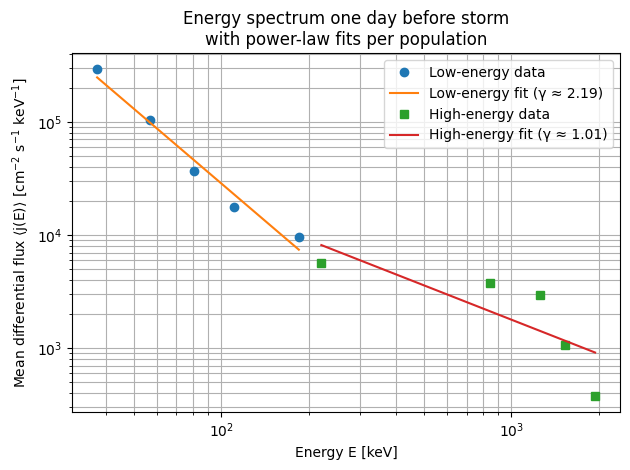

In [17]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

    """
    Υπολογίζει A, gamma για j(E) = A * E^(-gamma) στα σημεία (E, J).
    Επιστρέφει επίσης την fitted καμπύλη J_fit.
    """
    # Φιλτράρισμα τυχόν μη θετικών τιμών πριν τα log10
    mask = (E_keV > 0) & (J > 0)
    Epos = E_keV[mask]
    Jpos = J[mask]

    logE = np.log10(Epos)
    logJ = np.log10(Jpos)

    b, a = np.polyfit(logE, logJ, 1)  # logJ = a + b logE
    gamma = -b
    A = 10**a

    # Fitted καμπύλη στις αρχικές ενέργειες
    J_fit = A * (E_keV**(-gamma))

    return A, gamma, J_fit


# Φόρτωση
rbsp = sio.loadmat("data/RBSP.mat")
rbsp_energy = sio.loadmat("data/RBSPenergy.mat")

T         = rbsp["T"].flatten()
CountRate = rbsp["CountRate"]
E    = rbsp_energy["E"].flatten()
Emin = rbsp_energy["Emin"].flatten()
Emax = rbsp_energy["Emax"].flatten()
G    = rbsp_energy["G"].flatten()

dE = Emax - Emin

def matlab_datenum_to_datetime(datenum_array):
    return np.array([
        dt.datetime.fromordinal(int(d)) +
        dt.timedelta(days=float(d) % 1) -
        dt.timedelta(days=366)
        for d in datenum_array
    ])

time = matlab_datenum_to_datetime(T)

# Διαφορική ροή
flux = CountRate / (G * dE)   # (N,10)

# Μία ημέρα πριν την καταιγίδα: 2013-03-16
start = dt.datetime(2013, 3, 16, 0, 0, 0)
end   = dt.datetime(2013, 3, 17, 0, 0, 0)
mask_day = (time >= start) & (time < end)

flux_day = flux[mask_day, :]              # (N_day, 10)
mean_flux = np.nanmean(flux_day, axis=0)  # μέση ροή ανά κανάλι (10,)

# === ΧΩΡΙΖΟΥΜΕ ΣΕ ΕΝΕΡΓΕΙΑΚΟΥΣ ΠΛΗΘΥΣΜΟΥΣ ===
low_idx  = np.arange(0, 5)   # κανάλια 1–5
high_idx = np.arange(5, 10)  # κανάλια 6–10

E_low  = E[low_idx]
J_low  = mean_flux[low_idx]
E_high = E[high_idx]
J_high = mean_flux[high_idx]

# --- (δ2) Power law fitting ανά ενεργειακό πληθυσμό με fit_power_law ---

A_low,  gamma_low,  Jfit_low  = fit_power_law(E_low,  J_low)
A_high, gamma_high, Jfit_high = fit_power_law(E_high, J_high)

print("Low-energy population (channels 1–5):")
print(f"  A     ≈ {A_low:.3e}")
print(f"  gamma ≈ {gamma_low:.3f}")

print("High-energy population (channels 6–10):")
print(f"  A     ≈ {A_high:.3e}")
print(f"  gamma ≈ {gamma_high:.3f}")

# Plot για δ1 + δ2
plt.figure()
plt.loglog(E_low,  J_low,  'o', label="Low-energy data")
plt.loglog(E_low,  Jfit_low,  '-', label=f"Low-energy fit (γ ≈ {gamma_low:.2f})")
plt.loglog(E_high, J_high, 's', label="High-energy data")
plt.loglog(E_high, Jfit_high, '-', label=f"High-energy fit (γ ≈ {gamma_high:.2f})")
plt.xlabel("Energy E [keV]")
plt.ylabel("Mean differential flux ⟨j(E)⟩ [cm$^{-2}$ s$^{-1}$ keV$^{-1}$]")
plt.title("Energy spectrum one day before storm\nwith power-law fits per population")
plt.grid(True, which="both")
plt.legend()
plt.tight_layout()
plt.show()

Exponential fits:
  Low-energy:  J0 ≈ 1.900e+06,  E0 ≈ 19.84 keV
  High-energy: J0 ≈ 7.332e+03, E0 ≈ 1041.78 keV


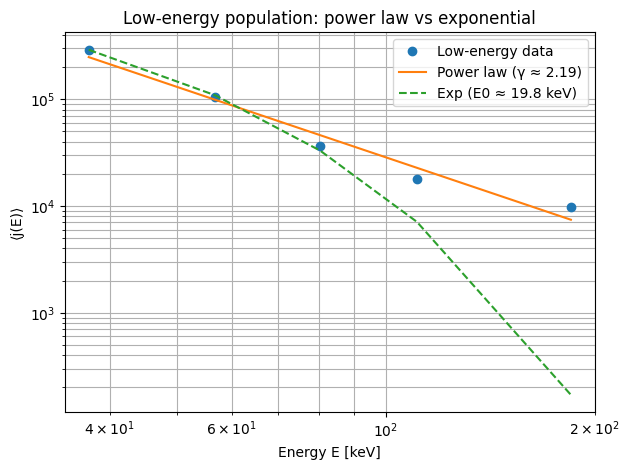

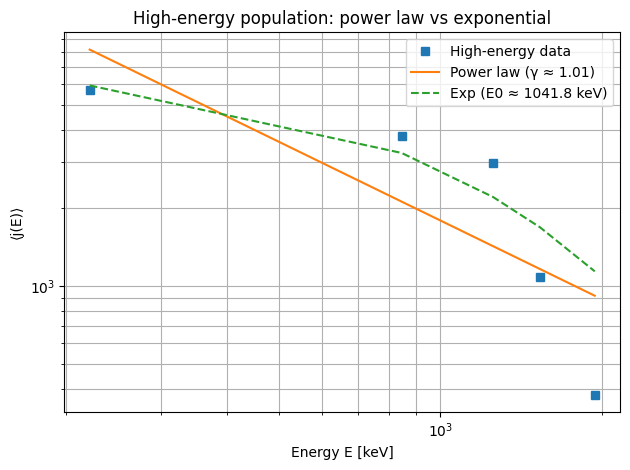

In [18]:
from scipy.optimize import curve_fit

def exp_model(E_keV, J0, E0):
    """
    Εναλλακτικό μοντέλο:
        j(E) = J0 * exp(-E / E0)
    """
    return J0 * np.exp(-E_keV / E0)

# Fit για low-energy population
p0_low = (np.max(J_low), 20.0)   # αρχικές τιμές [J0, E0]
popt_low, _ = curve_fit(exp_model, E_low, J_low, p0=p0_low)
J0_low, E0_low = popt_low

# Fit για high-energy population
p0_high = (np.max(J_high), 200.0)
popt_high, _ = curve_fit(exp_model, E_high, J_high, p0=p0_high)
J0_high, E0_high = popt_high

print("Exponential fits:")
print(f"  Low-energy:  J0 ≈ {J0_low:.3e},  E0 ≈ {E0_low:.2f} keV")
print(f"  High-energy: J0 ≈ {J0_high:.3e}, E0 ≈ {E0_high:.2f} keV")

# Σύγκριση power law vs exponential για κάθε πληθυσμό
plt.figure()
plt.loglog(E_low, J_low, 'o', label="Low-energy data")
plt.loglog(E_low, Jfit_low, '-', label=f"Power law (γ ≈ {gamma_low:.2f})")
plt.loglog(E_low, exp_model(E_low, J0_low, E0_low), '--', label=f"Exp (E0 ≈ {E0_low:.1f} keV)")
plt.xlabel("Energy E [keV]")
plt.ylabel("⟨j(E)⟩")
plt.title("Low-energy population: power law vs exponential")
plt.grid(True, which="both")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure()
plt.loglog(E_high, J_high, 's', label="High-energy data")
plt.loglog(E_high, Jfit_high, '-', label=f"Power law (γ ≈ {gamma_high:.2f})")
plt.loglog(E_high, exp_model(E_high, J0_high, E0_high), '--', label=f"Exp (E0 ≈ {E0_high:.1f} keV)")
plt.xlabel("Energy E [keV]")
plt.ylabel("⟨j(E)⟩")
plt.title("High-energy population: power law vs exponential")
plt.grid(True, which="both")
plt.legend()
plt.tight_layout()
plt.show()
